# Srikant - 19A1HP041

In [1]:
import pandas as pd #for loading files as data frames
import numpy as np #for arithmatic operations
df_ad = pd.read_csv('Advertising.csv') #reading the dataset into a dataframe

In [2]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [3]:
df_ad[df_ad.Day.isnull()] #identifying null values

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [4]:
df_ad = df_ad.dropna(subset = ['Day']) #delete Null value rows
df_ad.info() # checking again if there are equal number non null of rows for each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [5]:
df_ad[df_ad.Day.isnull()] #checking if null rows are deleted

,Sno,TV,Radio,Newspaper,Day,Sales


In [6]:
df_ad['Day'].unique() ##gives unique values in the column

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [7]:
pd.get_dummies(df_ad['Day']) #converts category to indicator variables

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,1,0
198,1,0,0


In [8]:
categorical_features = ['Day'] # making variable for categorical var
X_features = ['TV', 'Radio', 'Newspaper', 'Day'] # list of non categorical and independent columns

In [9]:
encoded_df = pd.get_dummies(df_ad[X_features], columns = categorical_features) #adds category columns seperately

In [10]:
encoded_df.columns #display new columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [11]:
X_features = encoded_df.columns
X_features # making a list of independent columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [12]:
encoded_df.describe() # describing the new columns

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.020305,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.141399,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,0.000000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,0.000000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,0.000000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000,1.000000


In [13]:
df_ad['Sales'].describe() # describing sales column

count    197.000000
mean      14.102030
std        5.192302
min        1.600000
25%       10.400000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [14]:
import matplotlib.pyplot as plt # importing the required libraries for ploting
import seaborn as sn
%matplotlib inline

In [15]:
import warnings # importing the warning library
warnings.filterwarnings('ignore') # used to ignore the warning given by plot functions

In [16]:
sales_by_day = df_ad.groupby('Day')['Sales'].mean().reset_index() # grouping by days and taking their mean sales
sales_by_day

,Day,Sales
0,Holiday,13.175000
1,Weekdays,14.033113
2,Weekend,14.438095


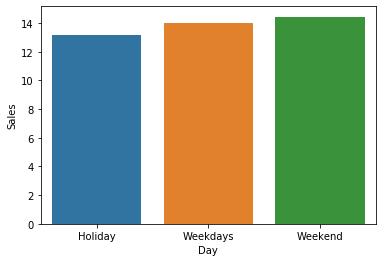

In [17]:
sn.barplot(x = 'Day', y = 'Sales', data = sales_by_day); # plotting the bar chart with types of days in x axis and sales in y axis

## we are observing higher sales during weekends

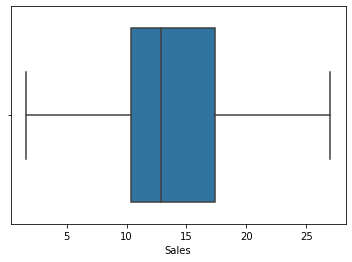

In [18]:
sn.boxplot(df_ad['Sales']) # plotting bar chart for sales column to check any outliers

## no outliers in sales columns. we can find the average and median sales

In [19]:
encoded_df.head(5)

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,0,0,1
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,0,1,0
3,151.5,41.3,58.5,0,1,0
4,180.8,10.8,58.4,0,1,0


In [20]:
import statsmodels.api as sm # importing library
from sklearn.model_selection import train_test_split # importing train test function from sklearn
X = sm.add_constant(encoded_df) # adding a new column constant along with all the independent variables.
Y = df_ad['Sales'] # defing the y axis in equation
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7, random_state = 98 ) # splitting data into 70% tarining set and 30% validation set

In [21]:
df_model = sm.OLS(train_y, train_X).fit() # fitting the set in Ordinary Least sqaure model
df_model.summary2() #printing the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.003   
Dependent Variable: Sales            AIC:                856.8932
Date:               2020-08-11 23:09 BIC:                874.4131
No. Observations:   137              Log-Likelihood:     -422.45 
Df Model:           5                F-statistic:        1.081   
Df Residuals:       131              Prob (F-statistic): 0.374   
R-squared:          0.040            Scale:              29.195  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          7.9037    1.6784   4.7090  0.0000   4.5833  11.2240
TV             0.0072    0.0076   0.9492  0.3443  -0.0078   0.0223
Radio         -0.0040    0.0341  -0.1169  0.9071  -0.0715   0.0635
Newspaper      0.0014    0.0241   0.0595  0.9527  -0.0463   0.0491
Day_Holiday   -3.0588    2.9954  -1.0212  0.3091  -8.9845   2.8669
Day_Weekdays   5.6810    1.1284   5.0346  0.0000   3.4488   7.9133
Day_Weekend    5.2815    1.4320   3.6881  0.0003   2.4486   8.1144
-----------------------------------------------------------------
Omnibus:          6.369   Durbin-Watson:      2.025              
Prob(Omnibus):    0.041   Jarque-Bera (JB):   5.747              
Skew:             0.429   Prob(JB):           0.057              
Kurtosis:         2.481   Condition No.:      2388029115524803072
=================================================================
* The condition number is large (2e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

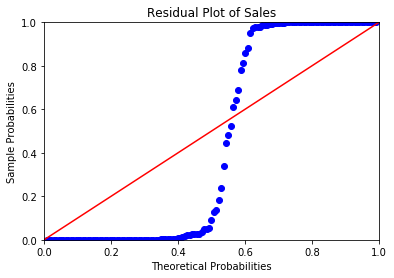

In [22]:
sales_resid = df_model.resid
probplot = sm.ProbPlot( sales_resid ) #Checking Normality
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Residual Plot of Sales" )
plt.show()

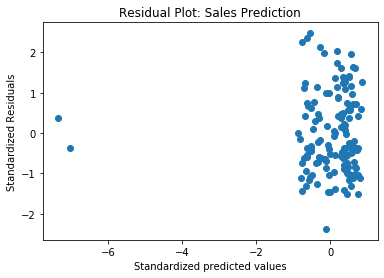

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( df_model.fittedvalues ), # plotting Test of Homoscedasticity
get_standardized_values( sales_resid ) )
plt.title( "Residual Plot: Sales Prediction" ); # title label
plt.xlabel( "Standardized predicted values") # x label
plt.ylabel( "Standardized Residuals"); #y label

In [24]:
from scipy.stats import zscore
encoded_df['z_score_sales'] = zscore( df_ad.Sales )
encoded_df[ (encoded_df.z_score_sales > 3.0) | (encoded_df.z_score_sales < -3.0) ] # checking z score between 3 to -3

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend,z_score_sales


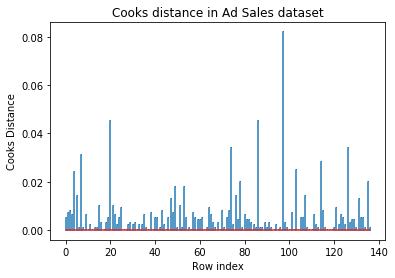

In [25]:
import numpy as np
ad_influence = df_model.get_influence()
(c, p) = ad_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Cooks distance in Ad Sales dataset" ); # title label
plt.xlabel( "Row index") # x lable
plt.ylabel( "Cooks Distance"); # y label

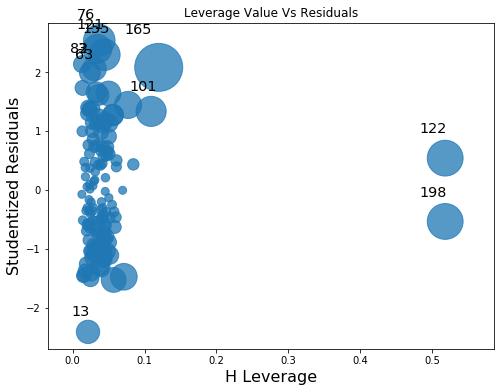

In [26]:
from statsmodels.graphics.regressionplots import influence_plot # importing required libraries
fig, ax = plt.subplots( figsize=(8,6) ) # plotting LVT
influence_plot( df_model, ax = ax )
plt.title( "Leverage Value Vs Residuals") # giving title to the diagram
plt.show(); # showing the plot

## RMSE for Validation Data

In [27]:
pred_y = df_model.predict( test_X )
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, pred_y)) # comparing MSE

5.24431931767374